In [1]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S


In [3]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C
357,1249,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.8792,NaN,S
240,1132,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55.0,0,0,112377,27.7208,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = total/len(df)*100
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [8]:
missing_percentage(train)

<IPython.core.display.Javascript object>

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [9]:
missing_percentage(test)

<IPython.core.display.Javascript object>

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [10]:
def percent_value_counts(df,feature):
    total = df[feature].value_counts(dropna=False)
    percent = total/len(df)*100
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [11]:
percent_value_counts(train,'Embarked')

<IPython.core.display.Javascript object>

,Total,Percent
S,644,72.278339
C,168,18.855219
Q,77,8.641975
NaN,2,0.224467


In [12]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

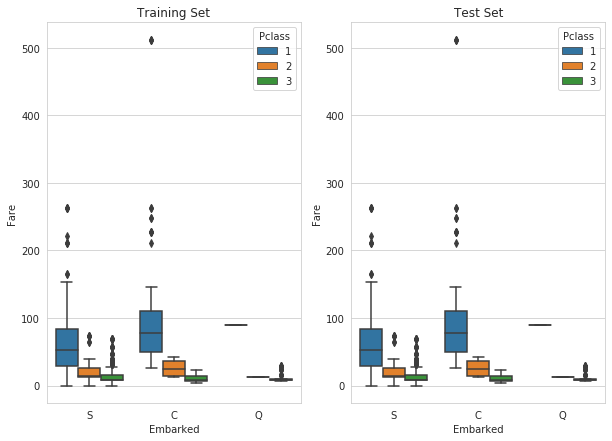

In [14]:
%matplotlib inline
sns.set_style('whitegrid')
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.set_title('Training Set')
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train,ax=ax1)
ax2.set_title('Test Set')
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train,ax=ax2)

In [15]:
train['Embarked'].fillna('C',inplace=True)

In [16]:
survivers = train.Survived
train.drop('Survived',axis=1,inplace=True)
all_data = pd.concat([train,test],axis=0)
all_data['Cabin'].fillna('N',inplace=True)

<IPython.core.display.Javascript object>

In [17]:
all_data['Cabin'] = [i[0] for i in all_data['Cabin']]

In [18]:
percent_value_counts(all_data,'Cabin')

<IPython.core.display.Javascript object>

,Total,Percent
N,1014,77.463713
C,94,7.181054
B,65,4.965623
D,46,3.514133
E,41,3.132162
A,22,1.680672
F,21,1.604278
G,5,0.381971
T,1,0.076394


In [19]:
missing_percentage(all_data)

<IPython.core.display.Javascript object>

,Total,Percent
Age,263,20.091673
Fare,1,0.076394
Embarked,0,0.000000
Cabin,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [20]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [22]:
all_data.groupby('Cabin')['Fare'].mean().sort_values(ascending=True)

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [23]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [24]:
with_N = all_data[all_data['Cabin']=='N']
without_N = all_data[all_data['Cabin']!= 'N']

In [25]:
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
all_data = pd.concat([with_N,without_N],axis=0)
all_data.sort_values(by='PassengerId',inplace=True)

<IPython.core.display.Javascript object>

In [27]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S


In [28]:
train = all_data.iloc[:891,:]
test = all_data.iloc[891:,:]
train['Survived'] = survivers

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [30]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [31]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [32]:
missing_value = test[(test['Pclass']==3)&
                     (test['Sex']=='male')&
                     (test['Embarked']=='S')]['Fare'].mean()
missing_value

12.718872

In [33]:
test['Fare'].fillna(missing_value,inplace=True)

/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [35]:
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [36]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,female,431.028662,2.159236,27.915709,0.694268,0.649682,44.479818,0.742038
1,male,454.147314,2.389948,30.726645,0.429809,0.235702,25.523893,0.188908


In [37]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

<IPython.core.display.Javascript object>

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


In [38]:
train["title"] = [i.split('.')[0] for i in train.Name]
train['title'] = [i.split(',')[1] for i in train.title]
train['title'].unique()

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [39]:
train.title = train.title.apply(lambda x: x.strip())
train['title'].unique()

/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [40]:
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test['Name']]

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [42]:
def name_converter(name):
    result = ''
    if name in ['Master', 'Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess',
       'Jonkheer','Dona']:
        result = 'rare'
    elif name in ['Ms', 'Mlle']:
        result = 'Mrs'
    elif name == 'Mme':
        result = 'Mr'
    else:
        result = name
    return result

In [43]:
train['title'] = train['title'].map(name_converter)
test['title'] = test['title'].map(name_converter)

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'rare'], dtype=object)

In [45]:
test['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'rare'], dtype=object)

In [46]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0,Mr


In [47]:
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,G,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S,Mrs,3


In [49]:
train.drop(['Name','SibSp','Parch'],axis=1,inplace=True)
test.drop(['Name','SibSp','Parch'],axis=1,inplace=True)

/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)   

In [51]:
train.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,title,family_size
0,3,male,22.0,A/5 21171,7.2500,G,S,0,Mr,2
1,1,female,38.0,PC 17599,71.2833,C,C,1,Mrs,2
2,3,female,26.0,STON/O2. 3101282,7.9250,G,S,1,Miss,1
3,1,female,35.0,113803,53.1000,C,S,1,Mrs,2
4,3,male,35.0,373450,8.0500,G,S,0,Mr,1


In [52]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family_size
0,3,male,34.5,330911,7.8292,G,Q,Mr,1
1,3,female,47.0,363272,7.0000,G,S,Mrs,2
2,2,male,62.0,240276,9.6875,G,Q,Mr,1
3,3,male,27.0,315154,8.6625,G,S,Mr,1
4,3,female,22.0,3101298,12.2875,G,S,Mrs,3


In [53]:
train.isnull().sum()

Pclass           0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
title            0
family_size      0
dtype: int64

In [54]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [55]:
categories = []
def categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            categories.append(column)

In [56]:
categorical(train)

In [57]:
categories

['Sex', 'Cabin', 'Embarked', 'title']

In [58]:
train.drop('Survived',axis=1,inplace=True)

In [59]:
total_data = pd.concat([train,test],axis=0)

<IPython.core.display.Javascript object>

In [60]:
onehot = pd.get_dummies(total_data[categories],drop_first=True)
onehot

<IPython.core.display.Javascript object>

,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare
0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,0,0,0,1,0,0,1,1,0,0
414,0,0,1,0,0,0,0,0,0,0,0,0,1
415,1,0,0,0,0,0,1,0,0,1,1,0,0
416,1,0,0,0,0,0,1,0,0,1,1,0,0


In [61]:
total_data.drop(categories,axis=1,inplace=True)
total_data

,Pclass,Age,Fare,family_size
0,3,22.0,7.2500,2
1,1,38.0,71.2833,2
2,3,26.0,7.9250,1
3,1,35.0,53.1000,2
4,3,35.0,8.0500,1
...,...,...,...,...
413,3,NaN,8.0500,1
414,1,39.0,108.9000,1
415,3,38.5,7.2500,1
416,3,NaN,8.0500,1


In [62]:
total_onehot_data = pd.concat([total_data,onehot],axis=1)
total_onehot_data

<IPython.core.display.Javascript object>

,Pclass,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare
0,3,22.0,7.2500,2,1,0,0,0,0,0,1,0,0,1,1,0,0
1,1,38.0,71.2833,2,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3,26.0,7.9250,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,35.0,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,1,0
4,3,35.0,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
414,1,39.0,108.9000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
415,3,38.5,7.2500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
416,3,NaN,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0


In [63]:
pclass = pd.get_dummies(total_onehot_data['Pclass'],drop_first=True)

<IPython.core.display.Javascript object>

In [64]:
total_onehot_data.drop('Pclass',axis=1,inplace=True)
total_onehot_data

,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare
0,22.0,7.2500,2,1,0,0,0,0,0,1,0,0,1,1,0,0
1,38.0,71.2833,2,0,0,1,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35.0,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,1,0
4,35.0,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
414,39.0,108.9000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
415,38.5,7.2500,1,1,0,0,0,0,0,1,0,0,1,1,0,0
416,NaN,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0


In [65]:
total_onehot_data = pd.concat([total_onehot_data,pclass],axis=1)

<IPython.core.display.Javascript object>

In [66]:
total_onehot_data.head()

,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare,2,3
0,22.0,7.2500,2,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,38.0,71.2833,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,35.0,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,35.0,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1


In [67]:
train = total_onehot_data.iloc[:891,:]
test = total_onehot_data.iloc[891:,:]

In [68]:
train.head()

,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare,2,3
0,22.0,7.2500,2,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,38.0,71.2833,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,35.0,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,35.0,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1


In [69]:
from sklearn.ensemble import RandomForestRegressor
def completing_age(df):
    temp_train = df.loc[df.Age.notnull()] 
    temp_test = df.loc[df.Age.isnull()]
    y = temp_train.Age.values 
    x = temp_train.loc[:, "Fare":].values
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    predicted_age = rfr.predict(temp_test.loc[:, "Fare":])
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    return df

In [70]:
completing_age(train)

/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare,2,3
0,22.000000,7.2500,2,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,38.000000,71.2833,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,26.000000,7.9250,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,35.000000,53.1000,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,35.000000,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0
887,19.000000,30.0000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
888,6.088007,23.4500,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
889,26.000000,30.0000,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
completing_age(test)

/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Age,Fare,family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,title_Mr,title_Mrs,title_rare,2,3
0,34.500000,7.8292,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
1,47.000000,7.0000,2,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,62.000000,9.6875,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,27.000000,8.6625,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
4,22.000000,12.2875,3,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,26.645417,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
414,39.000000,108.9000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
415,38.500000,7.2500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
416,26.645417,8.0500,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
Age            891 non-null float64
Fare           891 non-null float64
family_size    891 non-null int64
Sex_male       891 non-null uint8
Cabin_B        891 non-null uint8
Cabin_C        891 non-null uint8
Cabin_D        891 non-null uint8
Cabin_E        891 non-null uint8
Cabin_F        891 non-null uint8
Cabin_G        891 non-null uint8
Cabin_T        891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
title_Mr       891 non-null uint8
title_Mrs      891 non-null uint8
title_rare     891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(2), int64(1), uint8(15)
memory usage: 40.9 KB


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 18 columns):
Age            418 non-null float64
Fare           418 non-null float64
family_size    418 non-null int64
Sex_male       418 non-null uint8
Cabin_B        418 non-null uint8
Cabin_C        418 non-null uint8
Cabin_D        418 non-null uint8
Cabin_E        418 non-null uint8
Cabin_F        418 non-null uint8
Cabin_G        418 non-null uint8
Cabin_T        418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
title_Mr       418 non-null uint8
title_Mrs      418 non-null uint8
title_rare     418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(1), uint8(15)
memory usage: 19.2 KB


In [74]:
X = train.values
y = survivers
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [75]:
len(X_train)

668

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] =  sc.fit_transform(X_train[:,0:3])
X_test[:,0:3] = sc.fit_transform(X_test[:,0:3])

In [77]:
pd.DataFrame(X_train)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.121094,-0.483808,-0.550403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,-0.920316,-0.483231,3.013433,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.024219,-0.321651,0.043570,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.557033,-0.496572,-0.550403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.114066,-0.373040,-0.550403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.678127,1.003767,0.637542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,-0.775003,-0.484630,0.043570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
665,-0.336063,-0.487020,-0.550403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
666,0.460158,-0.295956,0.043570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
lr = LogisticRegression(solver='liblinear',random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       139
           1       0.74      0.76      0.75        84

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



[[117  22]
 [ 20  64]]


In [79]:
from sklearn.model_selection import GridSearchCV
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,
          4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1','l2']
param = {'penalty': penalties, 'C': C_vals}
grid = GridSearchCV(estimator=lr, 
                    param_grid = param,
                    scoring = 'accuracy',
                    n_jobs =-1,
                    cv = 5)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [80]:
lr_grid = LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr_grid.fit(X_train,y_train)
y_pred = lr_grid.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[115,  24],
       [ 20,  64]])

In [82]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,31)
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}
grid = GridSearchCV(KNeighborsClassifier(), param,cv=5,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [83]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')

In [84]:
knn_grid = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [85]:
knn_grid.fit(X_train,y_train)
y_pred = knn_grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[118,  21],
       [ 27,  57]])

In [86]:
knn_grid.score(X,y)

0.6307519640852974

In [87]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10]
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, verbose = 2,cv=5)
grid_search.fit(X,y)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............................ C=0.001, gamma=0.0001, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................ C=0.001, gamma=0.0001, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............................ C=0.001, gamma=0.0001, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............................ C=0.001, gamma=0.0001, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............................ C=0.001, gamma=0.0001, total=   0.1s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.1s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .

[CV] ............................... C=0.1, gamma=0.001, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=1.5, gamma=0.1, total=   0.2s
[CV] C=1.5, gamma=0.1 ................................................
[CV] ................................. C=1.5, gamma=0.1, total=   0.2s
[CV] C=1.5, gamma=0.1 ................................................
[CV] ................................. C=1.5, gamma=0.1, total=   0.2s
[CV] C=1.5, gamma=1 ..................................................
[CV] ................................... C=1.5, gamma=1, total=   0.2s
[CV] C=1.5, gamma=1 ..................................................
[CV] ................................... C=1.5, gamma=1, total=   0.2s
[CV] C=1.5, gamma=1 ..................................................
[CV] ................................... C=1.5, gamma=1, total=   0.2s
[CV] C=1.5, gamma=1 ..................................................
[CV] ................................... C=1.5, gamma=1, total=   0.2s
[CV] C=1.5, gamma=1 ..................................................
[CV] .

[CV] ................................ C=3, gamma=0.0001, total=   0.2s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................................ C=3, gamma=0.0001, total=   0.2s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................................ C=3, gamma=0.0001, total=   0.2s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................................ C=3, gamma=0.0001, total=   0.2s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   0.2s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   0.2s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   0.2s
[CV] C=3, gamma=0.001 ................................................
[CV] .

[CV] ................................. C=5, gamma=0.001, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   0.3s
[CV] C=5, gamma=0.01 .................................................
[CV] .................................. C=5, gamma=0.01, total=   0.3s
[CV] C=5, gamma=0.1 ..................................................
[CV] ................................... C=5, gamma=0.1, total=   0.3s
[CV] C=5, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 275 out of 275 | elapsed:   57.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [88]:
svm_grid = grid_search.best_estimator_

In [90]:
svm_grid.fit(X_train,y_train)
y_pred = svm_grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[118,  21],
       [ 21,  63]])

In [95]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [11,12,13,14,15,16,17,18]
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                    param_grid = param, 
                    verbose=2, 
                    cv=5,
                    n_jobs = -1)
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 464 candidates, totalling 2320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 435 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 2320 out of 2320 | elapsed:   13.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'm

In [96]:
dtree_grid = grid.best_estimator_
dtree_grid.fit(X_train,y_train)
y_pred = dtree_grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[112,  27],
       [ 19,  65]])

In [99]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,160,170,210,220,230,270,300]
max_depth = range(1,10)
criterions = ['gini', 'entropy']
parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=5,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [105]:
rnf_grid = grid.best_estimator_
rnf_grid.fit(X_train,y_train)
y_pred = rnf_grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[124,  15],
       [ 24,  60]])

In [109]:
feature_importances = pd.DataFrame(rnf_grid.feature_importances_,
                                   index=train.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

<IPython.core.display.Javascript object>

,importance
Age,0.187939
Fare,0.163525
title_Mr,0.150679
Sex_male,0.149040
family_size,0.081646
3,0.061685
title_Mrs,0.044891
Cabin_G,0.026086
Embarked_S,0.024646
2,0.019937


In [110]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]
parameters = {'n_estimators':n_estimators,
             }
grid = GridSearchCV(BaggingClassifier(base_estimator= None),
                                 param_grid=parameters,
                                 cv=5,verbose=2,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   24.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [112]:
bag_grid = grid.best_estimator_
bag_grid.fit(X_train,y_train)
y_pred = bag_grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[120,  19],
       [ 25,  59]])

In [114]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.83


In [122]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=500)
ExtraTreesClassifier.fit(X_train, y_train)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.753


In [123]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', lr_grid),
    ('svc', svm_grid),
    ('random_forest', rnf_grid),
    ('decision_tree_grid',dtree_grid),
    ('knn_classifier', knn_grid),
    ('XGB_Classifier', XGBClassifier),
    ('ExtraTrees_Classifier', ExtraTreesClassifier)],voting='hard')
voting_classifier = voting_classifier.fit(X_train,y_train)

In [124]:
y_pred = voting_classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[119,  20],
       [ 23,  61]])

In [128]:
accuracy_score(y_test,y_pred)

0.8071748878923767

In [133]:
all_models = [lr_grid,
             knn_grid,
             svm_grid,
             dtree_grid,
             rnf_grid,
             bag_grid,
             voting_classifier
             ]
c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [134]:
c

{LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False): 0.8026905829596412,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                      weights='distance'): 0.7847533632286996,
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False): 0.8116591928251121,
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                        max_features=12, max_leaf_nodes=None,
                        min_impurity_decrease

In [136]:
test1 = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

In [137]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": test1['PassengerId'],
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

<IPython.core.display.Javascript object>